# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
#1. Looking at the latitude vs Max temp plot, we can surmise that generally in this example, the closer you are to 0 latitude, 
#the hotter the max temp for the city becomes. 
# 2. In late October, generally places in the Southern hemi will get colder when decreasing the latitude, while cities in northern hemi,
# as latitude decreases, will become warmer. As seen in Both lin regression plots for lat vs max temp
#3. Wind Speed, Humidity, and cloudiness do not have strong correlations with latitude. as seen in all plots for respective categories.


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# request weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city)

In [9]:
# Set Up Lists to Hold Reponse Info
c_name = []
lat = []
lon = []
max_temp = []
humid = []
cloud = []
wnd_spd = []
country_code = []
date = []
count = 1
leng = len(cities)
print(f"Retrieving Data:\n")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        c_name.append(response["name"])
        country_code.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wnd_spd.append(response["wind"]["speed"])
        c_record = response["name"]
        print(f"Processing Record {count} of {leng} | {c_record}")
        count += 1
    except:
        print("City not found. Skipping...") 
    continue
print(f"\n~~Finito~~\n")

Retrieving Data:

Processing Record 1 of 628 | Verkhnevilyuysk
Processing Record 2 of 628 | Albany
Processing Record 3 of 628 | Mataura
Processing Record 4 of 628 | San Patricio
Processing Record 5 of 628 | Maple Creek
Processing Record 6 of 628 | Khatanga
Processing Record 7 of 628 | Hermanus
Processing Record 8 of 628 | Punta Arenas
Processing Record 9 of 628 | Busselton
Processing Record 10 of 628 | Norman Wells
Processing Record 11 of 628 | Auki
Processing Record 12 of 628 | Sohag
Processing Record 13 of 628 | Cape Town
Processing Record 14 of 628 | São Filipe
Processing Record 15 of 628 | Esim
Processing Record 16 of 628 | Lebu
Processing Record 17 of 628 | Ushuaia
Processing Record 18 of 628 | Svetlaya
Processing Record 19 of 628 | Tuktoyaktuk
Processing Record 20 of 628 | Hobart
Processing Record 21 of 628 | Katherine
Processing Record 22 of 628 | Yumen
Processing Record 23 of 628 | Buraidah
Processing Record 24 of 628 | Airai
Processing Record 25 of 628 | Atuona
Processing Reco

Processing Record 191 of 628 | Cidreira
Processing Record 192 of 628 | Severo-Kuril'sk
Processing Record 193 of 628 | Nema
Processing Record 194 of 628 | Ituberá
Processing Record 195 of 628 | Kitimat
Processing Record 196 of 628 | North Battleford
Processing Record 197 of 628 | Whitehorse
Processing Record 198 of 628 | Honolulu
Processing Record 199 of 628 | Longyearbyen
Processing Record 200 of 628 | Touros
Processing Record 201 of 628 | Grindavik
Processing Record 202 of 628 | Mahébourg
Processing Record 203 of 628 | Marabu
Processing Record 204 of 628 | Fort Nelson
Processing Record 205 of 628 | Isangel
City not found. Skipping...
Processing Record 206 of 628 | Río Cuarto
Processing Record 207 of 628 | Bintulu
Processing Record 208 of 628 | Chapais
Processing Record 209 of 628 | Kuytun
Processing Record 210 of 628 | Yerbogachën
Processing Record 211 of 628 | Saint-Pierre
Processing Record 212 of 628 | Hirara
Processing Record 213 of 628 | Kikwit
Processing Record 214 of 628 | Ponta

Processing Record 386 of 628 | Morant Bay
Processing Record 387 of 628 | Muravlenko
Processing Record 388 of 628 | Hanawa
City not found. Skipping...
Processing Record 389 of 628 | Brandon
Processing Record 390 of 628 | La Paz
Processing Record 391 of 628 | Benguela
Processing Record 392 of 628 | Akdepe
Processing Record 393 of 628 | Vanavara
Processing Record 394 of 628 | Aldan
Processing Record 395 of 628 | Kuopio
Processing Record 396 of 628 | Port Hedland
Processing Record 397 of 628 | Kānt
Processing Record 398 of 628 | Alofi
Processing Record 399 of 628 | Zhoucheng
Processing Record 400 of 628 | Lieksa
Processing Record 401 of 628 | Mana
Processing Record 402 of 628 | Karakol
Processing Record 403 of 628 | Mariinsk
Processing Record 404 of 628 | Khovd
Processing Record 405 of 628 | Aksarka
Processing Record 406 of 628 | Semey
Processing Record 407 of 628 | Santa Isabel Rio Negro
Processing Record 408 of 628 | Bamako
Processing Record 409 of 628 | Alta Floresta
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
print(f"Gathered data for {count} out of {leng} possible cities")

Gathered data for 579 out of 628 possible cities


In [11]:
data = {
    "City": c_name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wnd_spd,
    "Country": country_code,
    "Date": date
}
df1 = pd.DataFrame(data)
df1

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkhnevilyuysk,63.4453,120.3167,0.93,97,100,4.30,RU,1635026758
1,Albany,42.6001,-73.9662,10.97,63,96,3.21,US,1635026752
2,Mataura,-46.1927,168.8643,11.52,95,100,0.38,NZ,1635026663
3,San Patricio,28.0170,-97.5169,30.23,53,14,6.90,US,1635026758
4,Maple Creek,49.9168,-109.4848,10.92,59,100,5.51,CA,1635026758
...,...,...,...,...,...,...,...,...,...
573,Port Lincoln,-34.7333,135.8667,13.87,70,1,4.94,AU,1635026805
574,Krasnyy Chikoy,50.3643,108.7512,-1.80,74,32,1.21,RU,1635026901
575,Abu Samrah,35.3029,37.1841,18.41,61,0,3.24,SY,1635026901
576,Campbellford,44.3084,-77.7995,8.94,51,100,0.54,CA,1635026902


In [12]:
df1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkhnevilyuysk,63.4453,120.3167,0.93,97,100,4.30,RU,1635026758
1,Albany,42.6001,-73.9662,10.97,63,96,3.21,US,1635026752
2,Mataura,-46.1927,168.8643,11.52,95,100,0.38,NZ,1635026663
3,San Patricio,28.0170,-97.5169,30.23,53,14,6.90,US,1635026758
4,Maple Creek,49.9168,-109.4848,10.92,59,100,5.51,CA,1635026758


In [13]:
#save data to csv
df1.to_csv("../output_data/city_data.csv")

In [14]:
df2 = df1.describe()
df2

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,21.454343,19.692755,14.410900,73.541522,58.866782,3.454810,1.635027e+09
std,33.631552,88.263537,11.629826,19.202628,38.808617,2.465403,1.081665e+02
min,-54.800000,-175.200000,-25.460000,13.000000,0.000000,0.000000,1.635026e+09
25%,-6.315850,-54.824125,6.227500,65.000000,19.250000,1.532500,1.635027e+09
50%,26.145700,24.707350,16.010000,77.000000,73.000000,2.965000,1.635027e+09
75%,50.075075,99.607750,24.200000,88.000000,97.000000,4.660000,1.635027e+09
max,78.218600,179.316700,36.760000,100.000000,100.000000,15.820000,1.635027e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#no ciites greater than 100% humidity
df1["Humidity"].max()

100

In [16]:
#  Get the indices of cities that have humidity over 100%.


In [27]:
clean_df = df1


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


ModuleNotFoundError: No module named 'pyecharts'

In [21]:
nowish = pd.to_datetime('now').date()
nowish=print(f"{nowish}")
nowish

2021-10-23


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

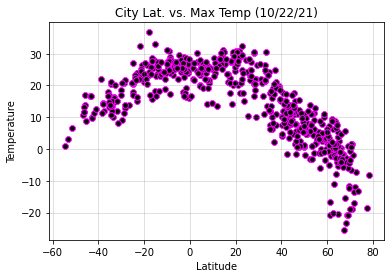

In [50]:
#strong negative nonlinear relationship
x=df1['Lat']
y=df1['Max Temp']
plt.scatter(x,y,marker="8",edgecolors="magenta",facecolors="black")
plt.grid(b=True,alpha=0.3,linestyle="-",color="grey")
plt.title(f"City Lat. vs. Max Temp (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../output_data/lat_vs_temp.png')
plt.show()
#This plot shows that city max temp is correlated with latitude of city, suggests that the closer you get to the equator
# the greater the max threshold for temperature is in that city.

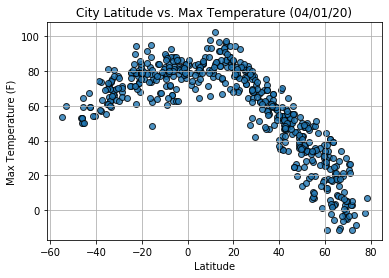

## Latitude vs. Humidity Plot

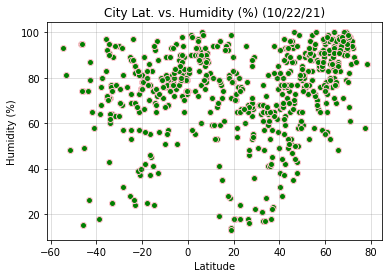

In [51]:
#really a meh positive nonlinear realtionsip, not too strong
y1=df1['Humidity']
plt.scatter(x,y1,edgecolors="pink",c="green")
plt.grid(b=True,alpha=0.3,linestyle="-",color="grey")
plt.title(f"City Lat. vs. Humidity (%) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/lat_vs_humid.png')
plt.show()
#This plot is plotting the location of our cities (by latitude) vs the humidity levels of each city. 
#This shows that humidity does have some dopendenence on how close you are to the equator

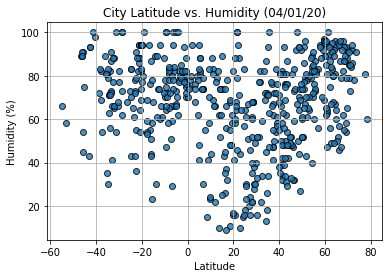

## Latitude vs. Cloudiness Plot

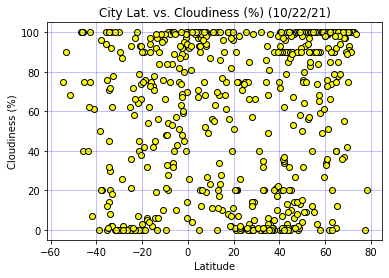

In [52]:
#not strong relationship non linear, 
y2=df1['Cloudiness']
plt.scatter(x,y2,edgecolors="black",c="yellow")
plt.grid(b=True,alpha=0.3,linestyle="-",color="blue")
plt.title(f"City Lat. vs. Cloudiness (%) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/lat_vs_cloud.png')
plt.show()
#This plot shows that cloudiness is not dependent on city latitude. 

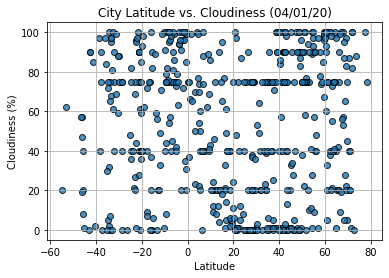

## Latitude vs. Wind Speed Plot

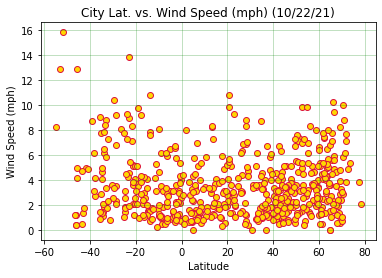

In [53]:
#not strong (maybe even) negative nonlinear correlation
y3=df1['Wind Speed']
plt.scatter(x,y3,c="gold",edgecolors="crimson")
plt.grid(b=True,alpha=0.3,linestyle="-",color="green")
plt.title(f"City Lat. vs. Wind Speed (mph) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/lat_vs_windspeed.png')
plt.show()
#This plot does have some shape to it, it is very slight though. 
#This plot could show that the closer you are to the equator, generally you will have lower wind speeds.


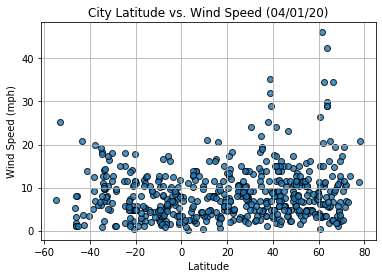

## Linear Regression

In [54]:
north_hemi = df1.loc[df1['Lat'] >= 0 ]
south_hemi = df1.loc[df1['Lat'] < 0 ]
n=north_hemi
s=south_hemi


In [55]:
n

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkhnevilyuysk,63.4453,120.3167,0.93,97,100,4.30,RU,1635026758
1,Albany,42.6001,-73.9662,10.97,63,96,3.21,US,1635026752
3,San Patricio,28.0170,-97.5169,30.23,53,14,6.90,US,1635026758
4,Maple Creek,49.9168,-109.4848,10.92,59,100,5.51,CA,1635026758
5,Khatanga,71.9667,102.5000,-11.97,93,100,7.69,RU,1635026759
...,...,...,...,...,...,...,...,...,...
572,Kashary,49.0400,41.0056,9.85,81,100,3.40,RU,1635026900
574,Krasnyy Chikoy,50.3643,108.7512,-1.80,74,32,1.21,RU,1635026901
575,Abu Samrah,35.3029,37.1841,18.41,61,0,3.24,SY,1635026901
576,Campbellford,44.3084,-77.7995,8.94,51,100,0.54,CA,1635026902


In [56]:
s

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Mataura,-46.1927,168.8643,11.52,95,100,0.38,NZ,1635026663
6,Hermanus,-34.4187,19.2345,13.83,71,14,1.14,ZA,1635026707
7,Punta Arenas,-53.1500,-70.9167,3.06,81,90,12.86,CL,1635026641
8,Busselton,-33.6500,115.3333,10.05,77,92,2.10,AU,1635026634
10,Auki,-8.7676,160.7034,28.93,68,20,1.12,SB,1635026759
...,...,...,...,...,...,...,...,...,...
543,Matadi,-5.8167,13.4500,25.65,84,99,2.73,CD,1635026843
549,Ilo,-17.6394,-71.3375,17.14,77,54,4.29,PE,1635026895
551,Mocuba,-16.8392,36.9856,23.50,70,4,1.19,MZ,1635026895
569,Kabare,-2.4683,28.8242,16.64,90,67,0.82,CD,1635026900


In [58]:
import scipy.stats as st


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [61]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg, y_reg)
# reg_values = x_reg*slope+intercept

# # linear regression line and correlation coefficient
# reg_line =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
# corrcoef = st.pearsonr(x_reg,y_reg)
# r_corrcoef = corrcoef[0].round(2)

# #print St. Pearson Correlation Coefficient
# print(f"The correlation coefficient between these two factors is: {r_corrcoef}")


 


# # scatter plot of the data

# plt.scatter(weights_cap,mean_t_cap,color='pink')
# plt.plot(flgrams,reg_values,"r-")
# plt.annotate(reg_line,(37,22),fontsize=15, color = 'green')
# plt.title('Linear Regression of Avg Tumor Volume (mm3) vs Mouse Weight (g)')
# plt.xlabel('Weight (g)')
# plt.ylabel('Avg Tumor Volume (mm3)')


The r-squarted is: -0.87


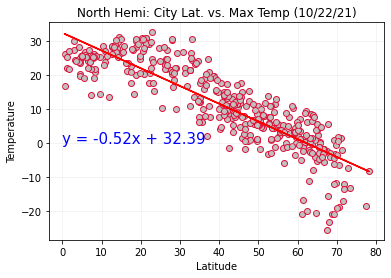

In [70]:
nx=n['Lat']
ny_temp=n['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx, ny_temp)
reg1 = nx*slope+intercept

# linear regression line and correlation coefficient
line1 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(nx,ny_temp)
r1 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r1}")


 


# scatter plot of the data

plt.scatter(nx,ny_temp,c="silver",edgecolors="crimson")
plt.plot(nx,reg1,'r-')
plt.annotate(line1,(0,0),fontsize=15,color="blue")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"North Hemi: City Lat. vs. Max Temp (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../output_data/north_lat_vs_temp.png')
plt.show()
#This plot shows a linear regression of Cities in northern Hemi lat coordinates vs the max temp of said city
#This plot can tell us that there is a stron negative linear relationship between the two variables

The r-value is: 0.46937863826630627


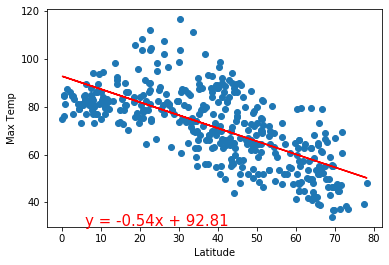

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squarted is: 0.76


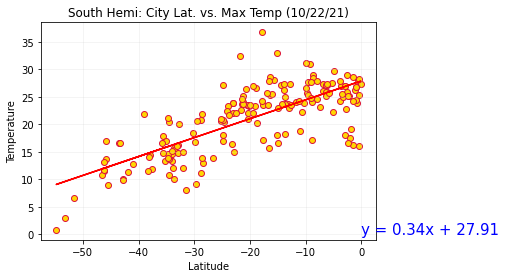

In [71]:
sx=s['Lat']
sy_temp=s['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx, sy_temp)
reg2 = sx*slope+intercept

# linear regression line and correlation coefficient
line2 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(sx,sy_temp)
r2 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r2}")

# scatter plot of the data

plt.scatter(sx,sy_temp,c="gold",edgecolors="crimson")
plt.plot(sx,reg2,'r-')
plt.annotate(line2,(0,0),fontsize=15,color="blue")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"South Hemi: City Lat. vs. Max Temp (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../output_data/south_lat_vs_temp.png')
plt.show()
#This plot shows a linear regression of Cities in southern Hemi lat coordinates vs the max temp of said city
#This plot can tell us that there is a strong positive linear relationship between Max temp and city lat coordinates for late October
#As latitude decreases, max temp of our city decreases as well.

The r-value is: 0.6082708688906918


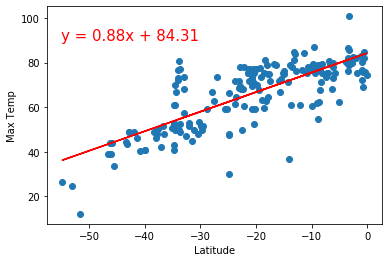

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squarted is: 0.21


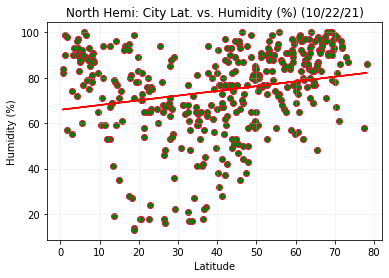

In [72]:
nx=n['Lat']
ny_humid=n['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx, ny_humid)
reg3 = nx*slope+intercept

# linear regression line and correlation coefficient
line3 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(nx,ny_humid)
r3 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r3}")

# scatter plot of the data

plt.scatter(nx,ny_humid,c="green",edgecolors="crimson")
plt.plot(nx,reg3,'r-')
plt.annotate(line3,(0,0),fontsize=15,color="blue")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"North Hemi: City Lat. vs. Humidity (%) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/north_lat_vs_humid.png')
plt.show()
#This plot shows a weaker positive nonlinear relationship between humidity % and the Northern Hemi. city 
#latitude coordinates in October. 
#as latitude increases (or nears 0), there could be an increase in humidity Percentage

The r-value is: 0.000543987878808455


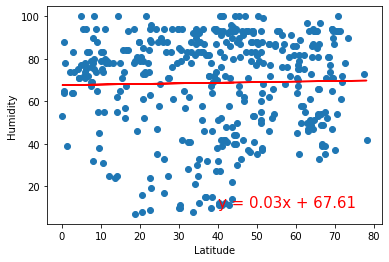

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squarted is: 0.17


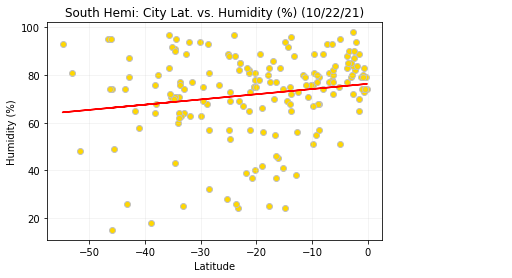

In [73]:
sx=s['Lat']
sy_humid=s['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx, sy_humid)
reg4 = sx*slope+intercept

# linear regression line and correlation coefficient
line4 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(sx,sy_humid)
r4 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r4}")

# scatter plot of the data

plt.scatter(sx,sy_humid,c="gold",edgecolors="silver")
plt.plot(sx,reg4,'r-')
plt.annotate(line4,(0,0),fontsize=15,color="red")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"South Hemi: City Lat. vs. Humidity (%) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/south_lat_vs_humid.png')
plt.show()

#This plot shows a weak positive nonlinear relationship between humidity % and the Southern Hemi city 
#latitude coordinates in October. 
#as latitude decreases (or nears 0), there could be an increase in humidity Percentage

The r-value is: 0.014985174297345524


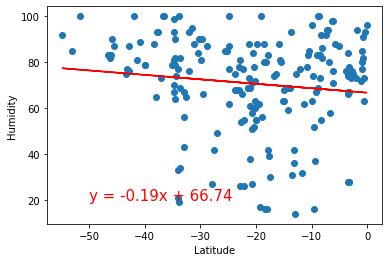

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squarted is: 0.19


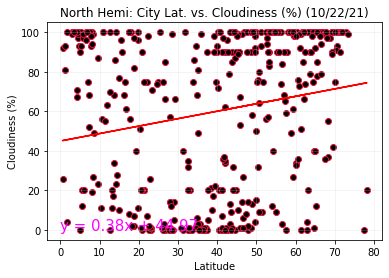

In [74]:
nx=n['Lat']
ny_cloud=n['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx, ny_cloud)
reg5 = nx*slope+intercept

# linear regression line and correlation coefficient
line5 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(nx,ny_cloud)
r5 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r5}")

# scatter plot of the data

plt.scatter(nx,ny_cloud,c="black",edgecolors="crimson")
plt.plot(nx,reg5,'r-')
plt.annotate(line5,(0,0),fontsize=15,color="magenta")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"North Hemi: City Lat. vs. Cloudiness (%) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/north_lat_vs_cloud.png')
plt.show()
#This plot shows a weak positive nonlinear relationship between Northern Hemi City Lat coordinates and the cloudiness %.


The r-value is: 0.0020898727664228514


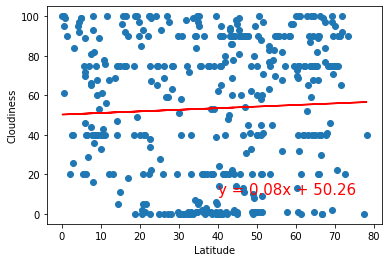

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squarted is: 0.13


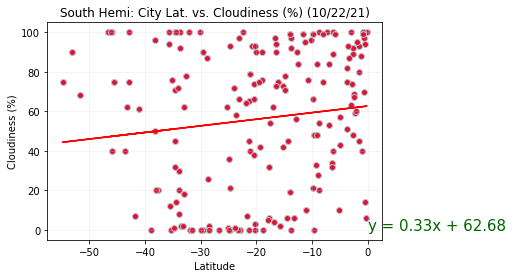

In [75]:
sx=s['Lat']
sy_cloud=s['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx, sy_cloud)
reg6 = sx*slope+intercept

# linear regression line and correlation coefficient
line6 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(sx,sy_cloud)
r6 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r6}")

# scatter plot of the data

plt.scatter(sx,sy_cloud,c="crimson",edgecolors="silver")
plt.plot(sx,reg6,'r-')
plt.annotate(line6,(0,0),fontsize=15,color="darkgreen")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"South Hemi: City Lat. vs. Cloudiness (%) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/south_lat_vs_cloud.png')
plt.show()
#This plot shows a weak positive nonlinear relationship between Southern Hemi City Latitudes coordinates and Cloudiness %'age
# in October.

The r-value is: 0.0035263772085582894


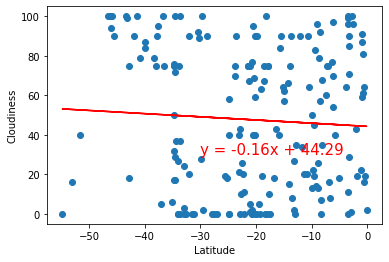

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squarted is: 0.18


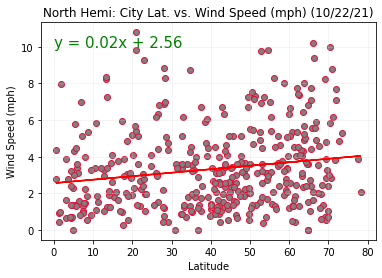

In [78]:
nx=n['Lat']
ny_wind=n['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx, ny_wind)
reg7 = nx*slope+intercept

# linear regression line and correlation coefficient
line7 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(nx,ny_wind)
r7 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r7}")

# scatter plot of the data

plt.scatter(nx,ny_wind,c="grey",edgecolors="crimson")
plt.plot(nx,reg7,'r-')
plt.annotate(line7,(0,10),fontsize=15,color="green")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"North Hemi: City Lat. vs. Wind Speed (mph) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/north_lat_vs_wind.png')
plt.show()
#This plot shows a weaker positive nonlinear relationship between Northern Hemi City Lat coordinates and wind speed in mph.


The r-value is: 0.04019723576144484


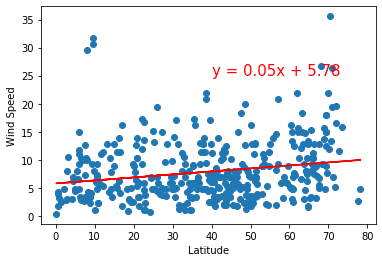

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squarted is: -0.3


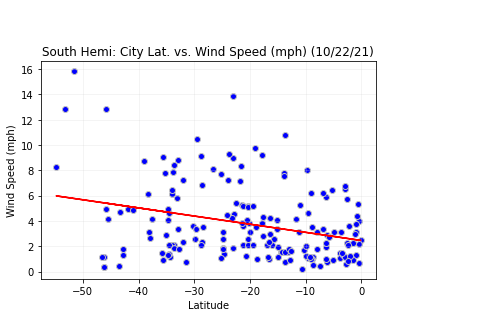

In [79]:
sx=s['Lat']
sy_wind=s['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx, sy_wind)
reg8 = sx*slope+intercept

# linear regression line and correlation coefficient
line8 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(sx,sy_wind)
r8 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r8}")

# scatter plot of the data

plt.scatter(sx,sy_wind,c="blue",edgecolors="silver")
plt.plot(sx,reg8,'r-')
plt.annotate(line8,(0,20),fontsize=15,color="darkgreen")
plt.grid(b=True,alpha=0.3,linestyle="-",color="lightgrey")
plt.title(f"South Hemi: City Lat. vs. Wind Speed (mph) (10/22/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/south_lat_vs_wind.png')
plt.show()
#This plot shows a weak negative nonlinear relationship between Southern Hemi City Latitudes coordinates and wind speed
# as mph in October.

The r-value is: 0.017128274759839232


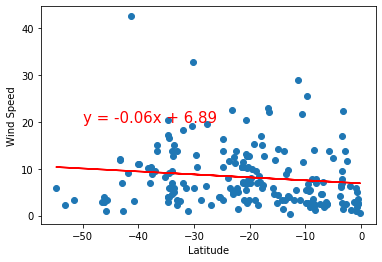

In [ ]:
#references
# https://stackoverflow.com/questions/67085377/valueerror-x-and-y-must-have-same-first-dimension-but-have-shapes-99955-and
# https://stackoverflow.com/questions/21738566/how-to-set-a-variable-to-be-todays-date-in-python-pandas
# https://matplotlib.org/stable/tutorials/introductory/customizing.html?highlight=scatter.edgecolors#a-sample-matplotlibrc-file
# https://stackoverflow.com/questions/63902183/how-do-i-plot-a-beautiful-scatter-plot-with-linear-regression
# https://www.w3schools.com/python/matplotlib_scatter.asp
#last homework

